In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import heapq
from pathlib import Path

sns.set_palette("pastel", 9)
#husl

In [57]:
def save(title):
    plt.savefig(f'report/images/{title}.pdf', format='pdf', bbox_inches='tight')

### Visualization functions

In [85]:
def general_info(df):
    print("################### Shape #################### \n", df.shape, "\n")
    print("################### Info ####################")
    df.info()
    print("\n", "################### Unique values #################### \n", df.nunique(), "\n")
    print("################### Nulls #################### \n", df.isnull().sum(axis=0), "\n")
    print("################### Description #################### \n")
    return df.describe().T


def count_compare_plot(df, column, compare_column, stat="count", rotation=0, order=None):
    plt.figure(figsize=(12,6))
    sns.countplot(df, x=df[column], hue = df[compare_column], palette='Greens', gap=0.05, 
                  stat=stat, order=order)
    plt.title(f'{compare_column} distribution in every {column} class')
    plt.xticks(rotation=rotation)
    plt.legend()
    plt.show()


def count_grouped_plot(df, column, groupby):
    plt.figure(figsize=(12,6))
    mean_values = df.groupby(groupby)[column].mean().reset_index()
    sns.barplot(x=groupby, y=column, data=mean_values, color="#03C04A")
    
    plt.title(f'Mean {column} for every {groupby} class')
    plt.xticks(rotation=60)
    plt.legend()
    plt.show()

def count_99_grouped(df, value, column, compare_column):
    df = df[[column, compare_column]]
    df_reduced = df[df[column] == value]
    df_reduced = df_reduced.groupby(compare_column).count()
    sns.countplot(df_reduced, x=df_reduced[compare_column])
    
    

def count_labels(data, x_column, stat="count", ax=None, rotat=60, minority=False):
    
    if x_column == :
        data[x_column] = data[x_column].astype(int)
    ax = sns.countplot(data=data, x=x_column.astype(int), hue=x_column, stat=stat, palette="Greens",
                       legend=False, ax=ax)
    
    if stat == "count":
        plt.ylabel("Count")
        for p in ax.patches:
            ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
        
    if stat == "percent":
        plt.ylabel("Percentage")
        if minority:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')
        else:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')
        
    
    plt.xlabel(x_column.capitalize())
    
    ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)

    #plt.title("Income Percentage Distribution")
        
    save("distr_clean")
    
#03C04A - parakeet
#03AC13" - shamrock
#028A0F - emerald


In [59]:
"""import seaborn as sns
import matplotlib.pyplot as plt

def count_compare_plot(df, column, compare_column, stat="count", rotation=0, order=None):
    plt.figure(figsize=(12,6))
    
    # Obliczanie sumy dla każdej wartości na osi x
    sum_series = df.groupby(column)[compare_column].agg(set_matplotlib_formats)
    
    # Rysowanie wykresu
    ax = sns.countplot(df, x=df[column], hue=df[compare_column], palette='Greens', gap=0.05, 
                  order=order)
    
    # Wyświetlanie sumy nad każdą wartością na osi x
    for i, val in enumerate(sum_series):
        # Dostosowanie położenia etykiety wartości
        height = ax.patches[i].get_height()  # Wysokość aktualnego słupka
        ax.text(i, height + max(sum_series)*0.01, str(val), ha='center', va='bottom', fontsize=9)
        # Ustawienie tekstu na wysokość nieco ponad górną krawędzią słupka
    
    plt.title(f'{compare_column} distribution in every {column} class')
    plt.xticks(rotation=rotation)
    plt.legend()
    plt.show()
# Przykładowe użycie
count_compare_plot(df, 'age', 'income')
"""

'import seaborn as sns\nimport matplotlib.pyplot as plt\n\ndef count_compare_plot(df, column, compare_column, stat="count", rotation=0, order=None):\n    plt.figure(figsize=(12,6))\n    \n    # Obliczanie sumy dla każdej wartości na osi x\n    sum_series = df.groupby(column)[compare_column].agg(set_matplotlib_formats)\n    \n    # Rysowanie wykresu\n    ax = sns.countplot(df, x=df[column], hue=df[compare_column], palette=\'Greens\', gap=0.05, \n                  order=order)\n    \n    # Wyświetlanie sumy nad każdą wartością na osi x\n    for i, val in enumerate(sum_series):\n        # Dostosowanie położenia etykiety wartości\n        height = ax.patches[i].get_height()  # Wysokość aktualnego słupka\n        ax.text(i, height + max(sum_series)*0.01, str(val), ha=\'center\', va=\'bottom\', fontsize=9)\n        # Ustawienie tekstu na wysokość nieco ponad górną krawędzią słupka\n    \n    plt.title(f\'{compare_column} distribution in every {column} class\')\n    plt.xticks(rotation=rotati

In [60]:
file_path = Path('adults_data','adults_imputed_train_data.csv')
raw_path = Path('adults_data','adults_raw_train_data.csv')

df_raw = pd.read_csv(raw_path) 
df_raw['income'] = df_raw['income'].replace({"<=50K.":"<=50K",
                                            ">50K.": ">50K"})

df = pd.read_csv(file_path)
df.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income
0,18-24,Federal-gov,344394.0,10.0,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0.0,40.0,United-States,0
1,61-70,Self-emp-inc,165667.0,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,40.0,United-States,0
2,25-30,Private,276624.0,10.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,40.0,United-States,0
3,31-40,Private,219546.0,13.0,Married-civ-spouse,Exec-managerial,Other-relative,White,Male,3411.0,47.0,United-States,0
4,31-40,Private,103474.0,9.0,Married-civ-spouse,Sales,Wife,White,Female,0.0,30.0,United-States,0


In [61]:
df_raw['income'].value_counts()

income
<=50K    29737
>50K      9336
Name: count, dtype: int64

In [62]:
colors = sns.color_palette("Greens", len(df.columns))
colors

[(0.9287658592848904, 0.9727335640138408, 0.9142791234140715),
 (0.8828143021914648, 0.9546943483275664, 0.8621914648212226),
 (0.8163783160322953, 0.9281199538638985, 0.7913264129181085),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.6529950019223376, 0.8600845828527489, 0.6288965782391387),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.45176470588235296, 0.7670895809304115, 0.4612072279892349),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.2378316032295272, 0.6523798539023453, 0.3510495963091119),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.09527104959630911, 0.5091118800461361, 0.24059976931949248),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.0, 0.3574625144175317, 0.14352941176470588)]

In [63]:
general_info(df)

################### Shape #################### 
 (36822, 13) 

################### Info ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36822 entries, 0 to 36821
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36822 non-null  object 
 1   workclass       36822 non-null  object 
 2   fnlwgt          36822 non-null  float64
 3   education-num   36822 non-null  float64
 4   marital-status  36822 non-null  object 
 5   occupation      36822 non-null  object 
 6   relationship    36822 non-null  object 
 7   race            36822 non-null  object 
 8   sex             36822 non-null  object 
 9   capital         36822 non-null  float64
 10  hours-per-week  36822 non-null  float64
 11  region          36822 non-null  object 
 12  income          36822 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 3.7+ MB

 ################### Unique values #########

,count,mean,std,min,25%,50%,75%,max
fnlwgt,36822.0,189506.673701,105333.746620,13492.0,117476.0,178316.0,237352.25,1484705.0
education-num,36822.0,10.135544,2.556648,1.0,9.0,10.0,13.00,16.0
capital,36822.0,1041.472136,7673.805087,-4356.0,0.0,0.0,0.00,99999.0
hours-per-week,36822.0,40.948808,12.028255,1.0,40.0,40.0,45.00,99.0
income,36822.0,0.247814,0.431749,0.0,0.0,0.0,0.00,1.0


In [64]:
dups = df[df.duplicated(subset=['age', 'workclass', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital',
       'hours-per-week', 'region'], keep=False)]

grouped_dups = dups.groupby(['age', 'workclass', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital',
       'hours-per-week', 'region'])["income"].nunique()

#grouped_dups[grouped_dups >1]
grouped_dups

age   workclass         education-num  marital-status      occupation         relationship  race   sex     capital  hours-per-week  region       
0-17  Private           6.0            Never-married       Handlers-cleaners  Own-child     White  Male    0.0      15.0            United-States    1
                                                                                                                    20.0            United-States    1
                                                           Other-service      Own-child     Black  Male    0.0      15.0            United-States    1
                                                                                            White  Female  0.0      15.0            United-States    1
                                                                                                                    25.0            United-States    1
                                                                                                   

## Boxploty

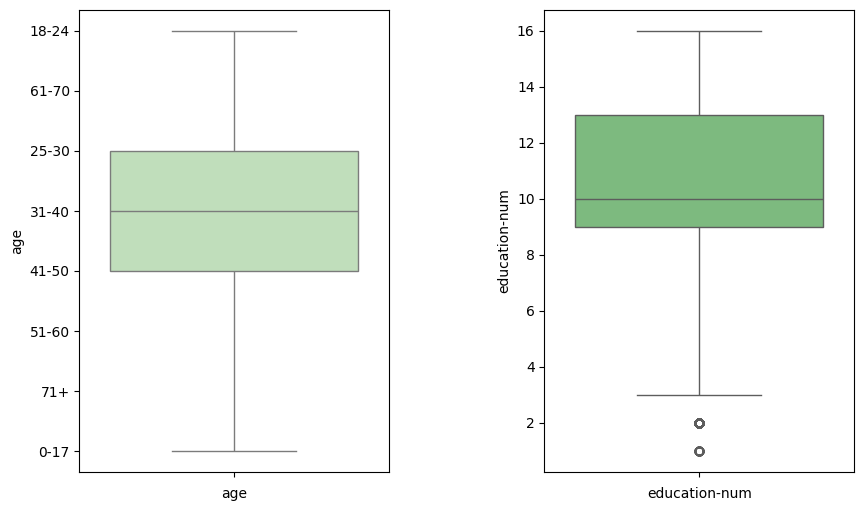

In [65]:
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
 
# add padding between the subplots
plt.subplots_adjust(wspace=0.5)
 
# draw boxplot for age in the 1st subplot
sns.boxplot(data=df['age'], ax=ax[0], color=colors[3],)
ax[0].set_xlabel('age')
 
 
# draw boxplot for stores_count in the 3rd subplot
sns.boxplot(data=df['education-num'], ax=ax[1], color=colors[6])
ax[1].set_xlabel('education-num')
 
# by default, you'll see x-tick label set to 0 in each subplot
# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    

In [66]:
colors2 = [colors[4], colors[2]]

## NaN visualization

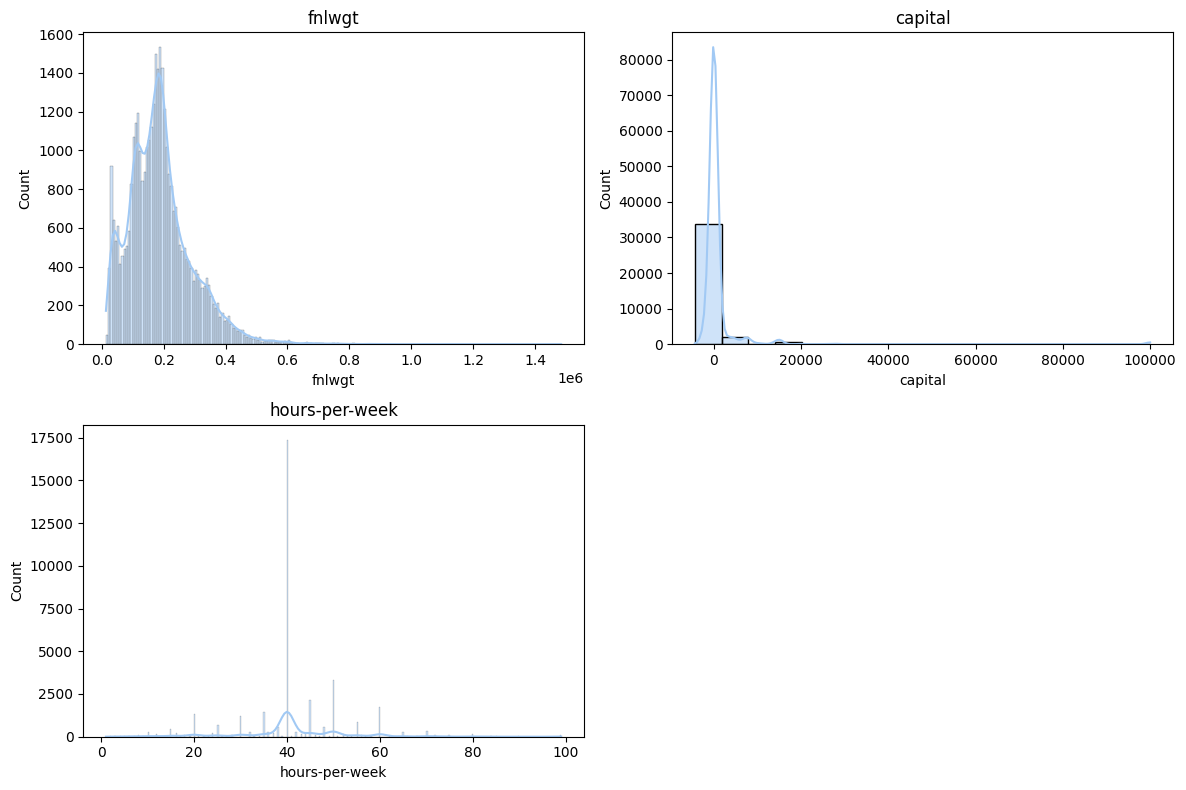

In [ ]:
numerical_features = ['fnlwgt', 'capital', 'hours-per-week']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

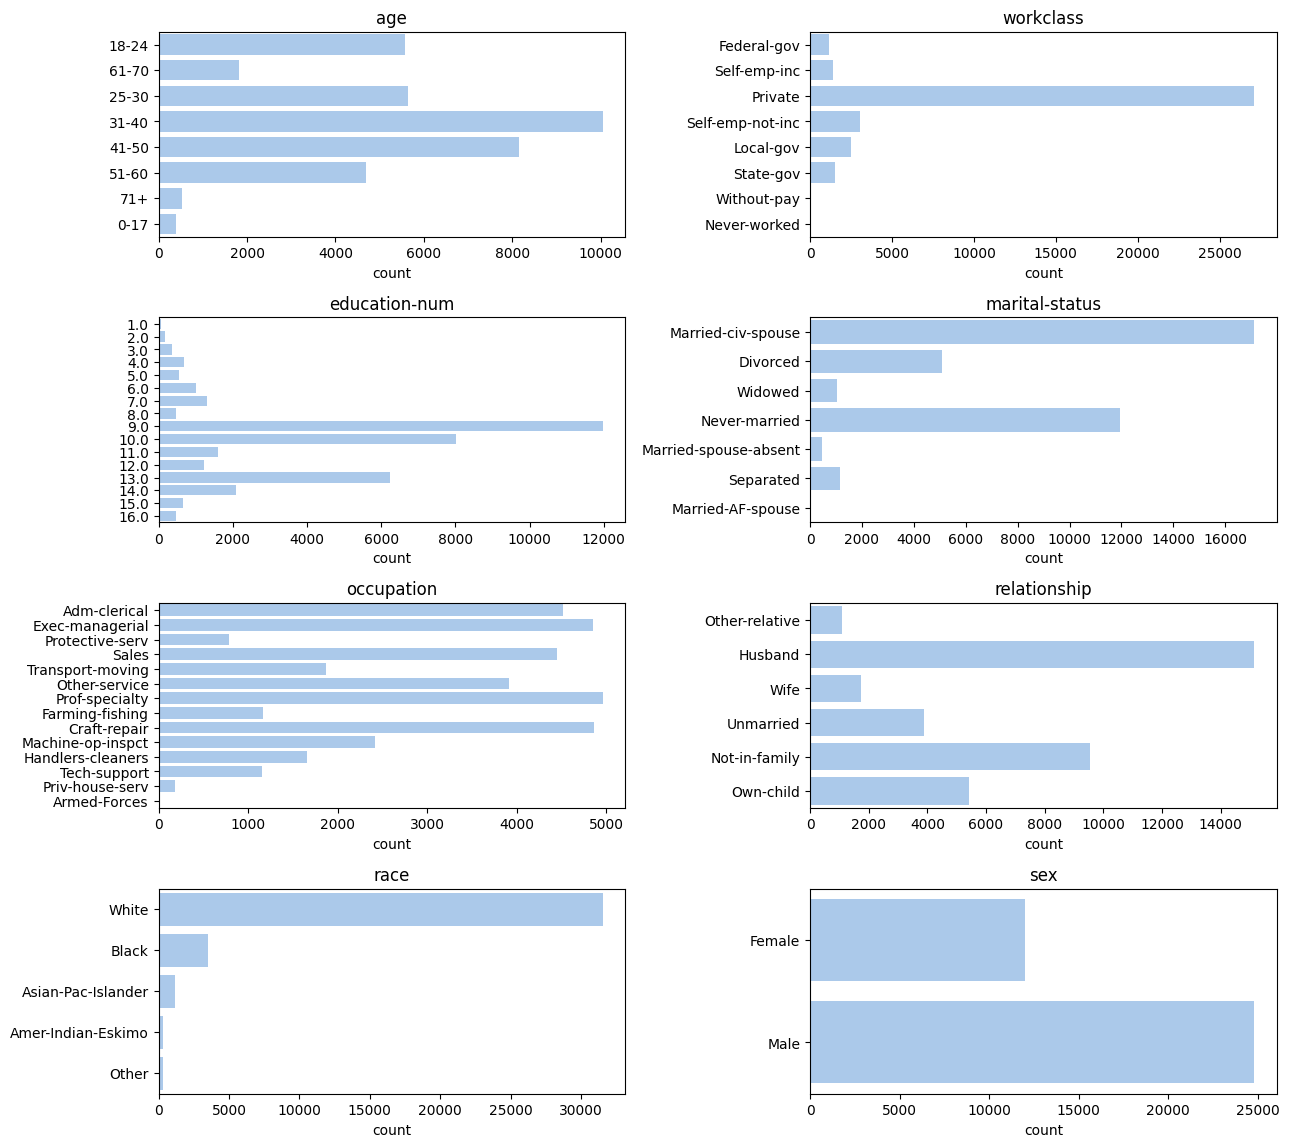

In [ ]:
categorical_features = ['age','workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'region']
plt.figure(figsize=(13, 14))
#plots without country
for i, feature in enumerate(categorical_features, 1):
    if i < len(categorical_features):
        plt.subplot(5, 2, i)
        sns.countplot(data=df, y=feature)       # can do stat="percent"
        plt.title(feature)
        plt.ylabel(None)
plt.tight_layout()
plt.show()

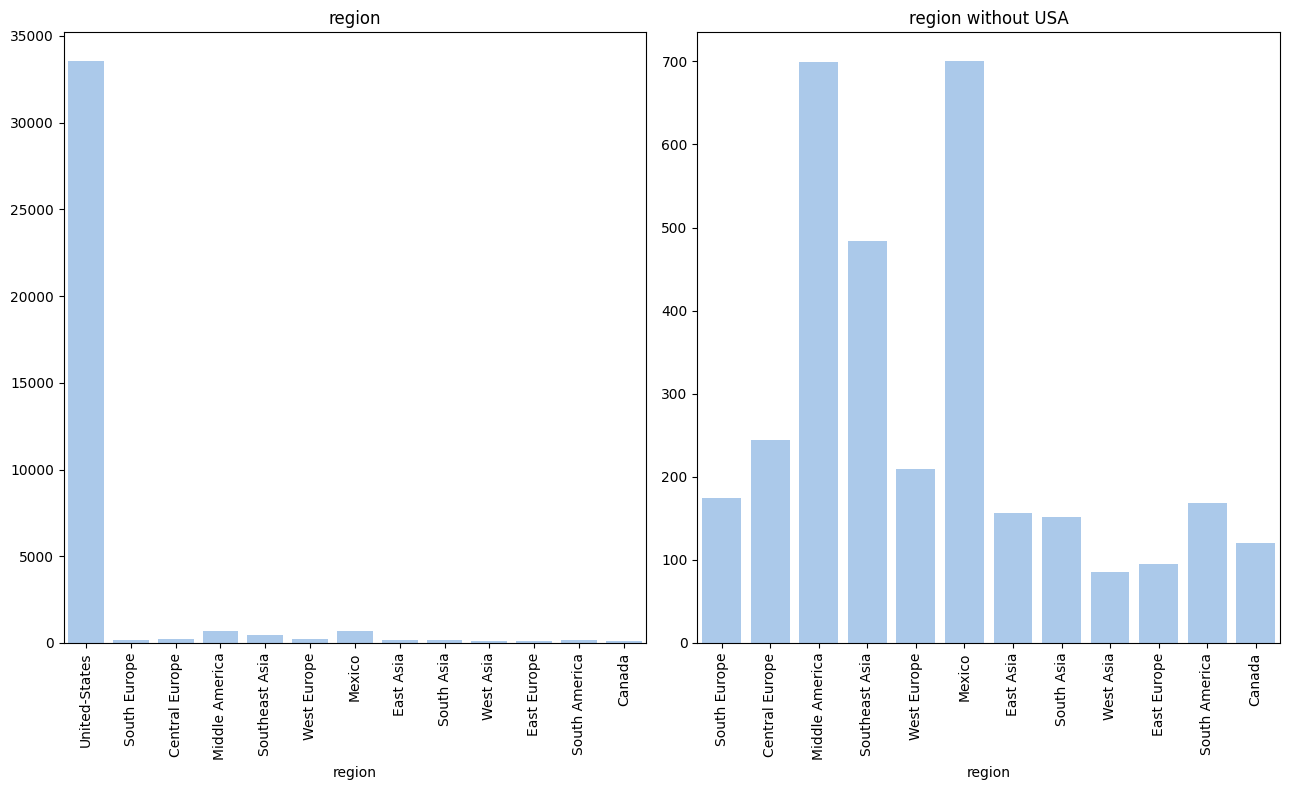

In [ ]:
fix, axes = plt.subplots(1, 2, figsize=(13, 8))
for i, usa in enumerate([True, False]):
    if usa:
        plt.subplot(1,2,1)
        sns.countplot(data = df, 
                      x = categorical_features[-1])
        plt.title(categorical_features[-1])
        plt.ylabel(None)
        plt.xticks(rotation=90)
    else:
        plt.subplot(1,2,2)
        sns.countplot(data = df[df['region'] != 'United-States'], 
                      x = categorical_features[-1])
        plt.title(categorical_features[-1] + ' without USA')
        plt.ylabel(None)
        plt.xticks(rotation=90)
        
plt.tight_layout()
plt.show()

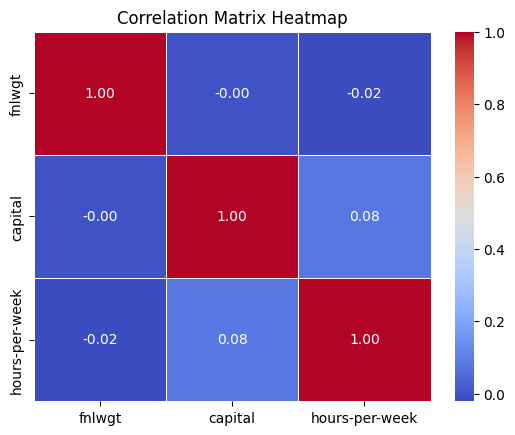

In [ ]:
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\wypyc\AppData\Local\Temp\ipykernel_24100\3989729042.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="income", stat="percent", palette="Greens")


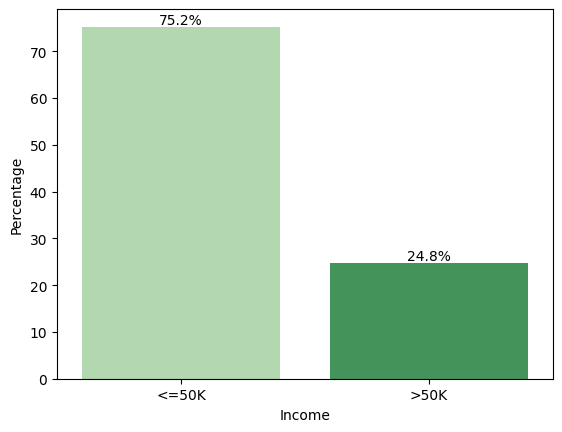

In [ ]:
ax = sns.countplot(data=df, x="income", stat="percent", palette="Greens")
plt.ylabel("Percentage")
plt.xlabel("Income")
#plt.title("Income Percentage Distribution")


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
save("distr_clean")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_20484\2610613364.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


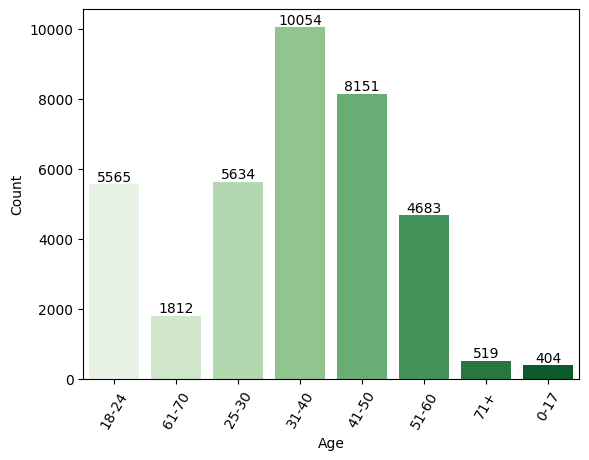

In [83]:
count_labels(df, "age", "count")
save("age_bar")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_20484\601623619.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)
C:\Users\wypyc\AppData\Local\Temp\ipykernel_20484\601623619.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels() ,rotation=rotat)


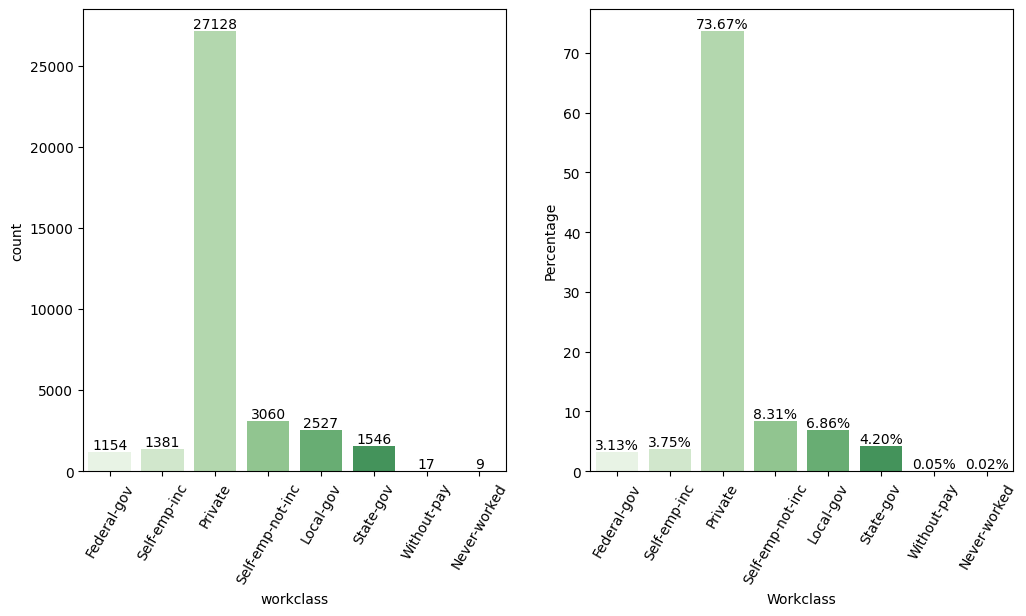

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
count_labels(df, "workclass", "count",ax=axes[0])
count_labels(df, "workclass", "percent",ax=axes[1], minority=True)
save("workclass_cp")

In [86]:
count_labels(df, "education-num", "percent", xint=True)
save("edu_bar")

AttributeError: 'str' object has no attribute 'astype'

C:\Users\wypyc\AppData\Local\Temp\ipykernel_24100\628597828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_raw, x="income", stat="percent", palette="Greens")


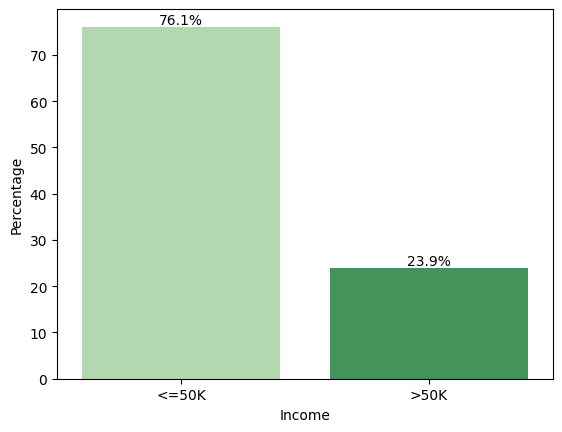

In [ ]:
ax = sns.countplot(data=df_raw, x="income", stat="percent", palette="Greens")
plt.ylabel("Percentage")
plt.xlabel("Income")
#plt.title("Income Percentage Distribution")


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
save("distr_raw")

In [ ]:
labels_age = ['0-17','18-24','25-30','31-40','41-50','51-60','61-70','71-80','81+']
count_compare_plot(df, column="age", compare_column="income", order=labels_age)

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1200x600 with 0 Axes>

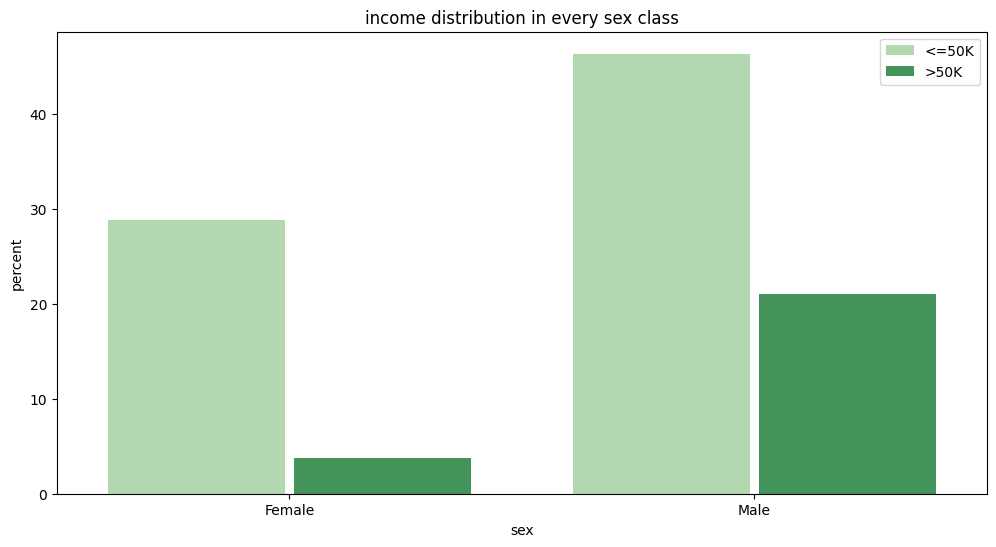

In [ ]:
count_compare_plot(df, column="sex", compare_column="income", stat="percent")

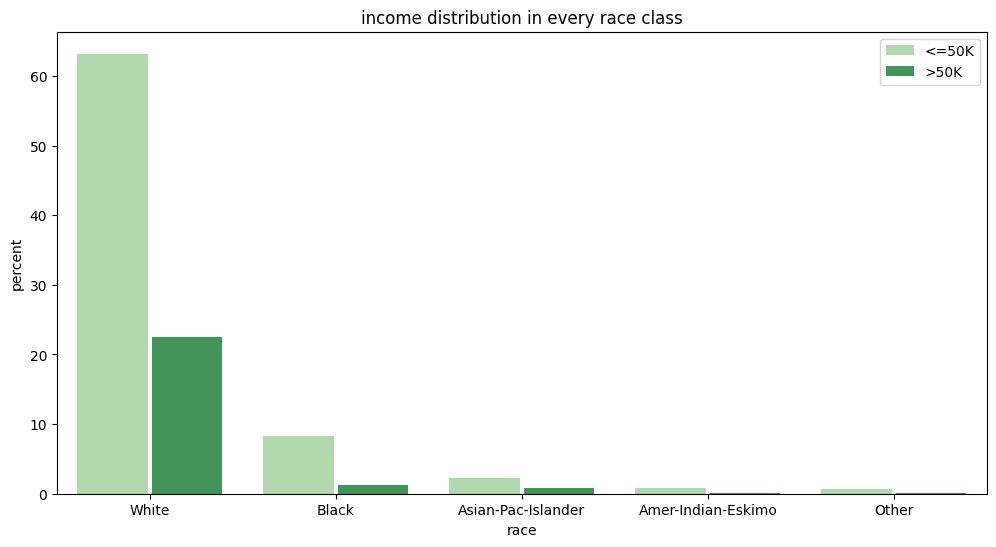

In [ ]:
count_compare_plot(df, column="race", compare_column="income", stat="percent")

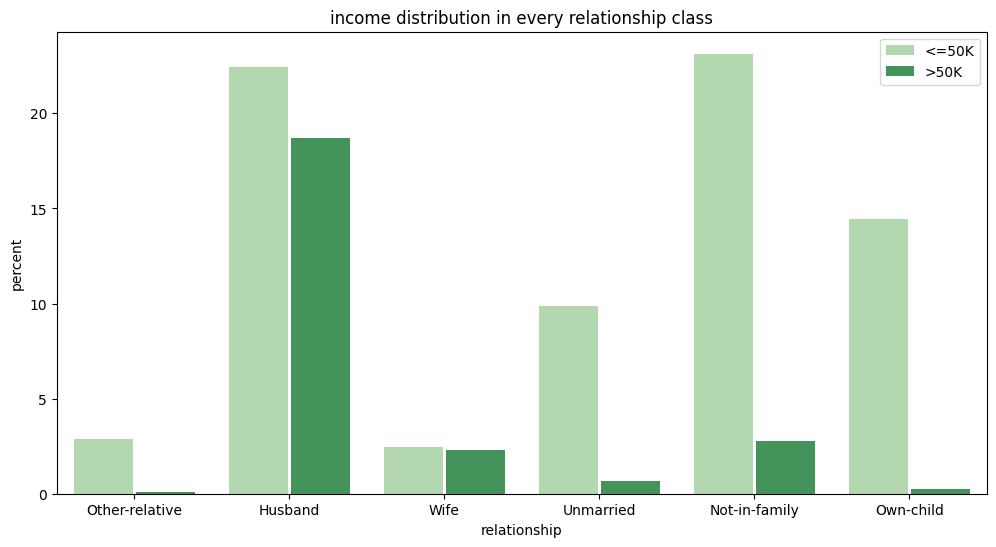

In [ ]:
count_compare_plot(df, column="relationship", compare_column="income", stat="percent")

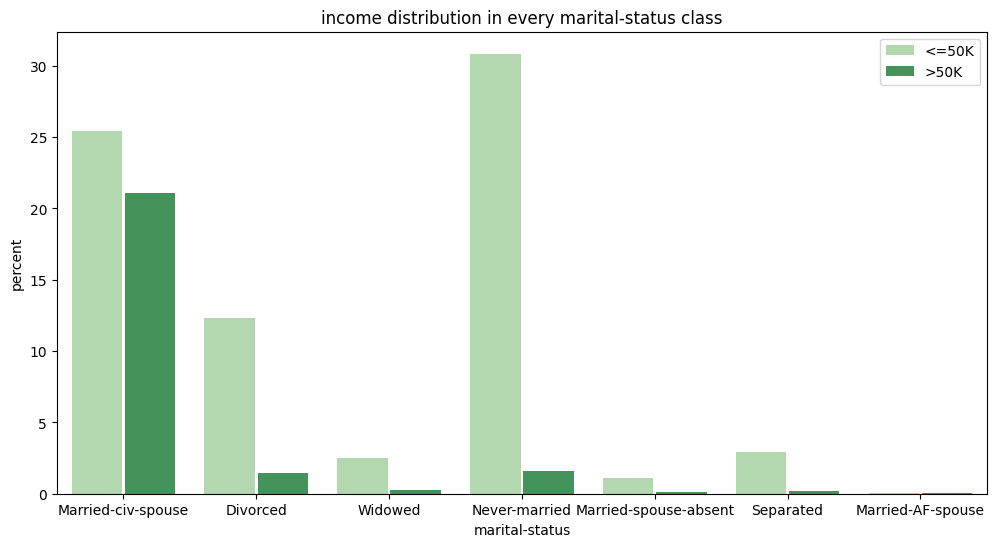

In [ ]:
count_compare_plot(df, column="marital-status", compare_column="income", stat="percent")

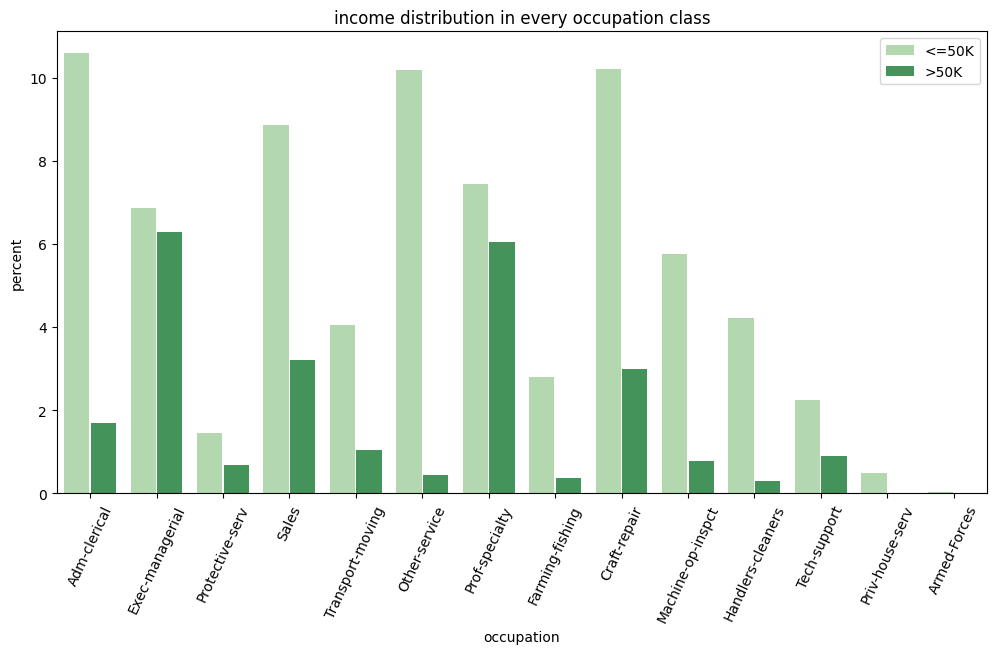

In [ ]:
count_compare_plot(df, column="occupation", compare_column="income", stat="percent", rotation=65)

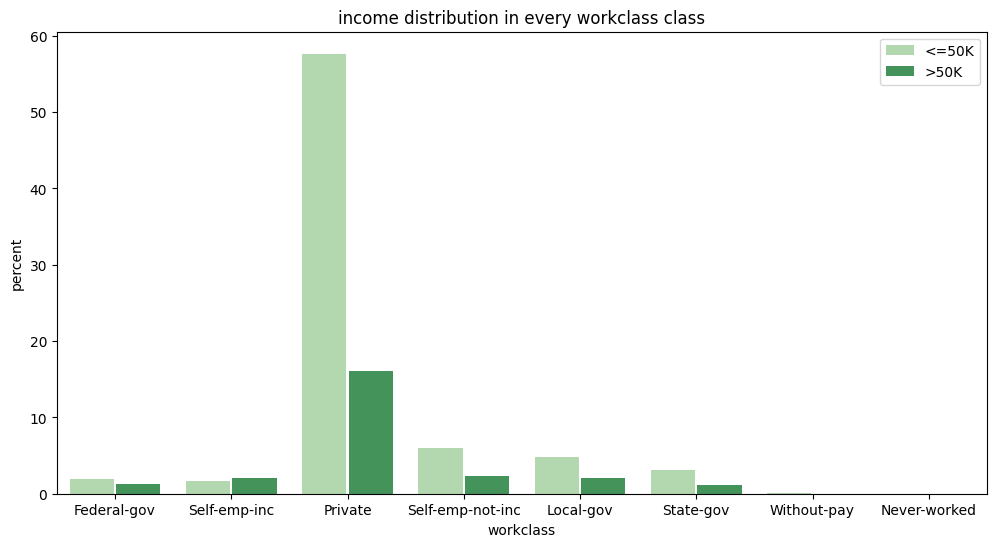

In [ ]:
count_compare_plot(df, column="workclass", compare_column="income", stat="percent")

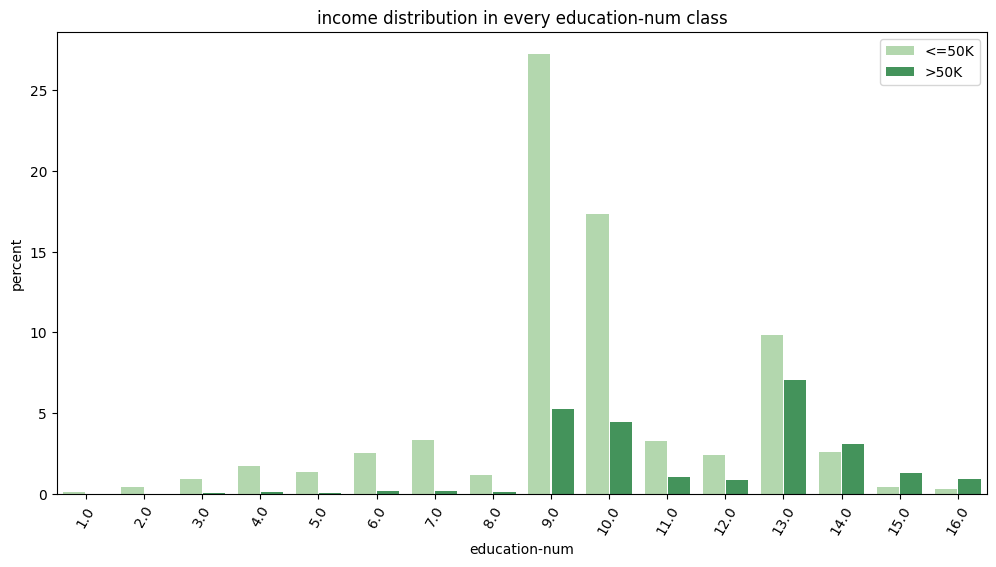

In [ ]:
count_compare_plot(df, column="education-num", compare_column="income", stat="percent", rotation=60)

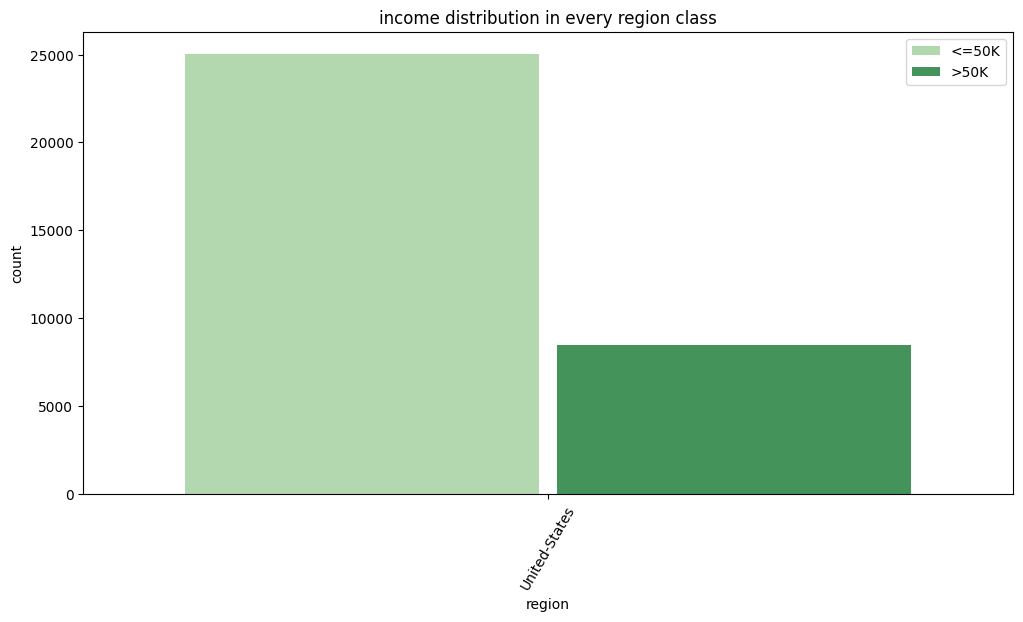

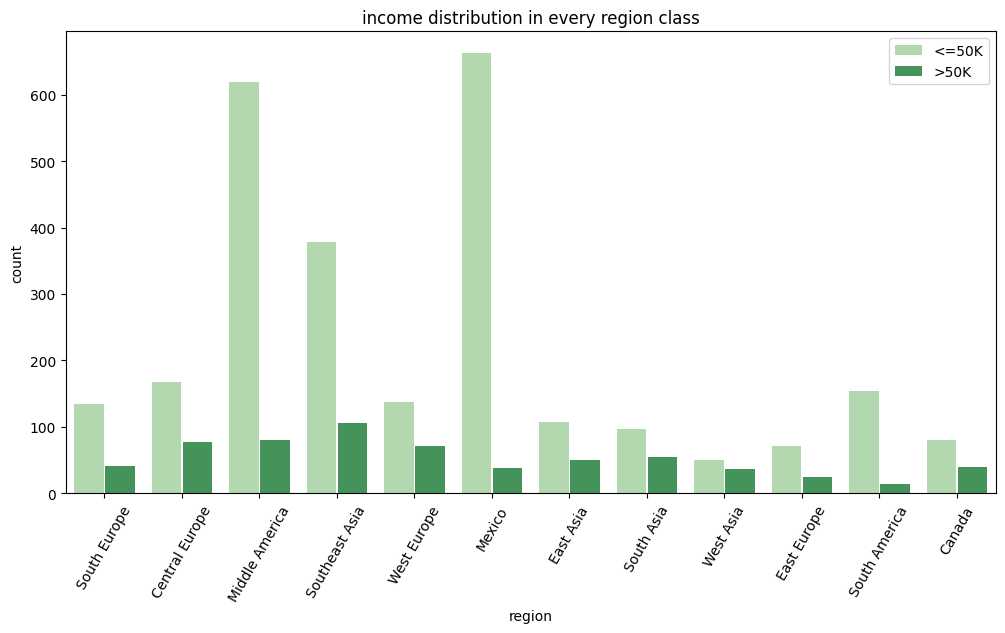

In [ ]:
count_compare_plot(df[df["region"] =='United-States'], column="region", compare_column="income", stat="count", rotation=60)
count_compare_plot(df[df["region"] !='United-States'], column="region", compare_column="income", stat="count", rotation=60)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


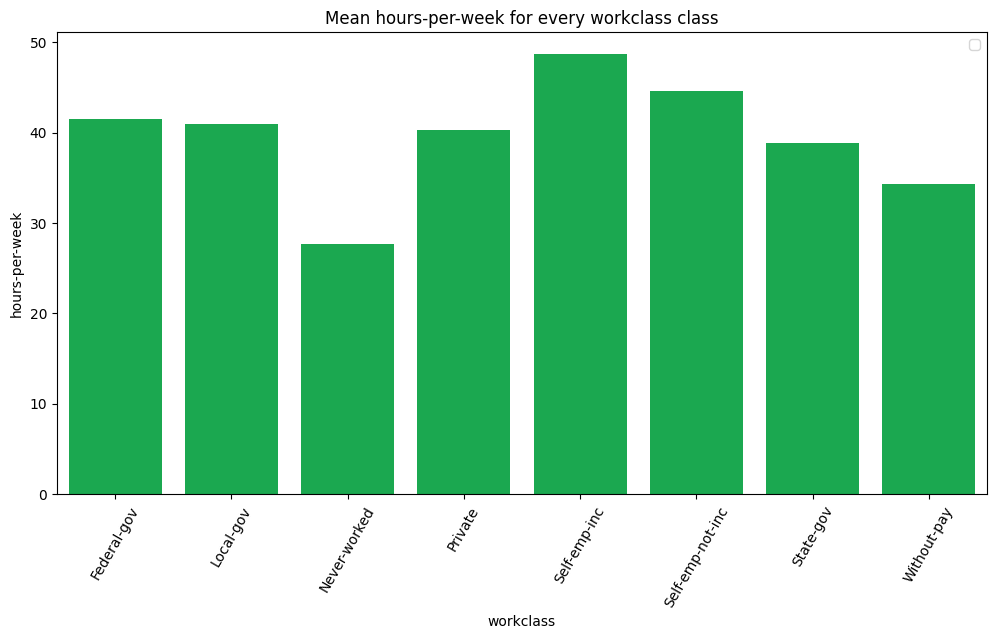

In [ ]:
count_grouped_plot(df, "hours-per-week", "workclass")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


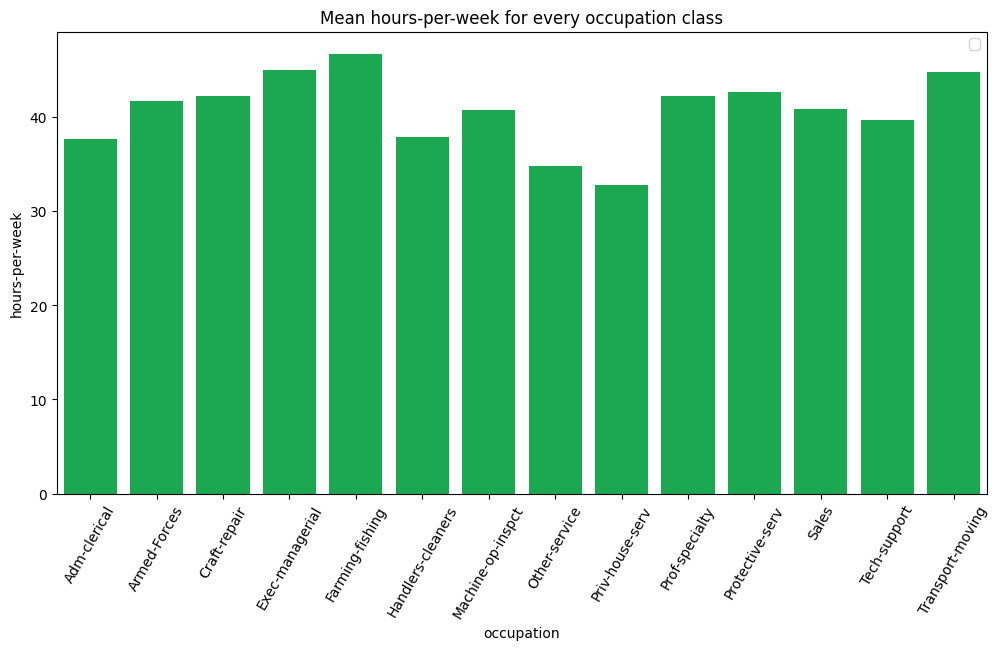

In [ ]:
count_grouped_plot(df, "hours-per-week", "occupation")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


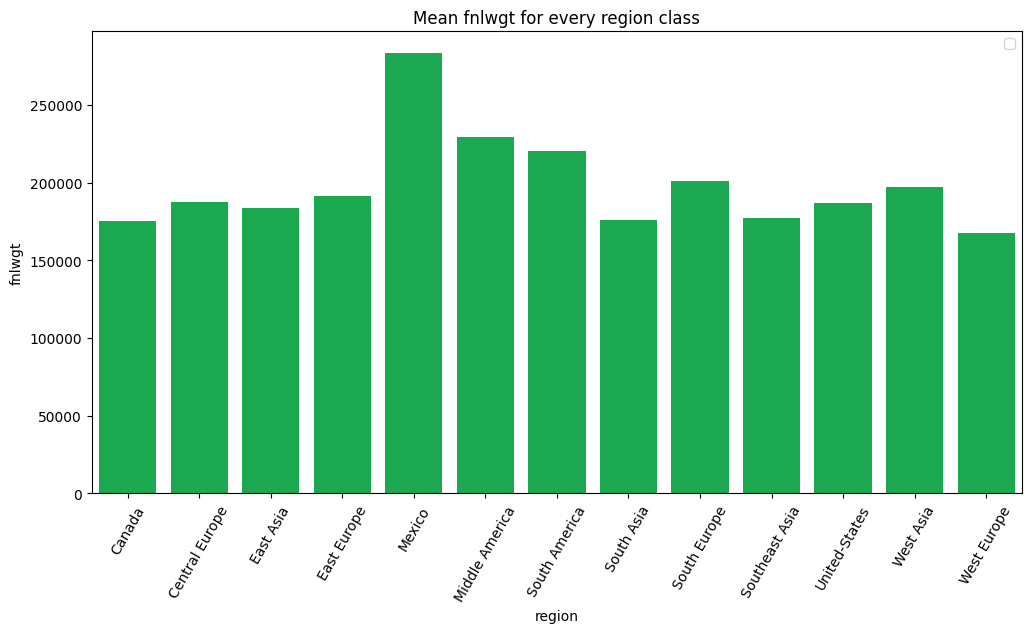

In [ ]:
count_grouped_plot(df, "fnlwgt", "region")

C:\Users\wypyc\AppData\Local\Temp\ipykernel_24100\157614950.py:2: UserWarning: 
The palette list has fewer values (1) than needed (42) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(df_raw, x='native-country', hue='native-country', palette=["#8ed08b"], legend=False)


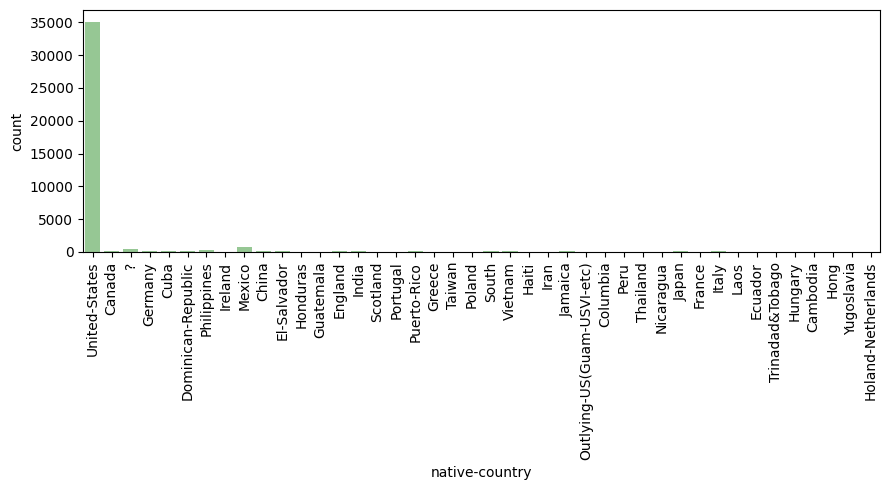

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(df_raw, x='native-country', hue='native-country', palette=["#8ed08b"], legend=False)
plt.xticks(rotation=90)
plt.tight_layout()
save('native_raw')
plt.show()

In [68]:
weird_workclass = df[df['workclass'].isin(['Never-worked','Without-pay'])]

In [71]:
weird_workclass.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income
689,25-30,Without-pay,212588.0,10.0,Married-civ-spouse,Farming-fishing,Own-child,White,Male,0.0,65.0,United-States,0
3672,71+,Without-pay,121004.0,9.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,55.0,United-States,0
4710,71+,Without-pay,216001.0,4.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,20.0,United-States,0
4974,18-24,Without-pay,232719.0,9.0,Never-married,Craft-repair,Own-child,Black,Male,0.0,40.0,United-States,0
6016,51-60,Without-pay,198262.0,9.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,30.0,United-States,0


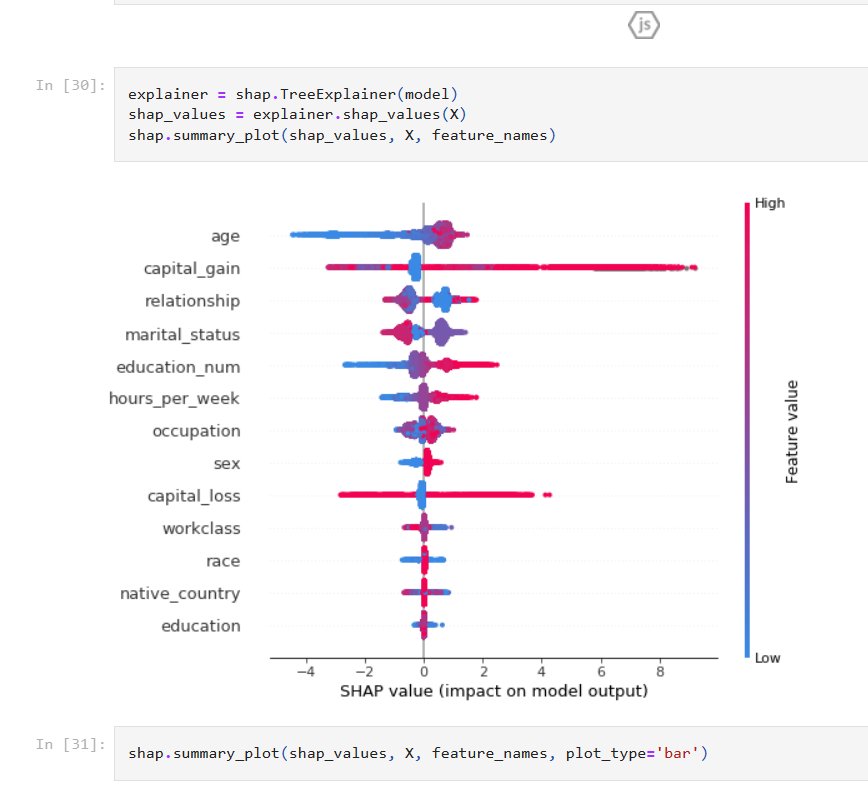